<h1>Himalayan database. Analysis and Visualization<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Peaks" data-toc-modified-id="Peaks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Peaks</a></span></li><li><span><a href="#Expeditions" data-toc-modified-id="Expeditions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Expeditions</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#Number-expeditions-by-year" data-toc-modified-id="Number-expeditions-by-year-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Number expeditions by year</a></span></li><li><span><a href="#Number-expeditions-by-peak" data-toc-modified-id="Number-expeditions-by-peak-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Number expeditions by peak</a></span></li><li><span><a href="#%-peak-expeditions-by-season" data-toc-modified-id="%-peak-expeditions-by-season-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>% peak expeditions by season</a></span></li><li><span><a href="#Patterns-between-seasons" data-toc-modified-id="Patterns-between-seasons-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Patterns between seasons</a></span></li></ul></li></ul></div>

# Introduction

Reference: https://www.himalayandatabase.com/

*The Himalayan Database is a compilation of records for all expeditions that have
climbed in the Nepalese Himalaya. The database is based on the expedition
archives of Elizabeth Hawley, a longtime journalist based in Kathmandu, and it
is supplemented by information gathered from books, alpine journals, and
correspondence with Himalayan climbers.
The original data covered all expeditions from 1905 through 2003 to more than
300 significant Nepalese peaks. Also included were expeditions to both sides of
border peaks such as Everest, Cho Oyu, Makalu, and Kangchenjunga as well as
to some smaller border peaks. Data on expeditions to trekking peaks were
limited to early attempts, first ascents, and major accidents.*


- The Peaks table describes the mountaineering peaks of Nepal, one record for
each peak. There are more than 465 records in this table.
- The Exped table describes each of the climbing expeditions. There are more
than 10,500 records in this table.
- The Members table describes each of the members on the climbing team and
hired personnel who were significantly involved in the expedition. There are
more than 77,900 records in this table.
- The Refer table describes the literature references for each expedition,
primarily major books and journal and magazine articles. There are more than
14,600 records in this table.

The relation between the tables is: 

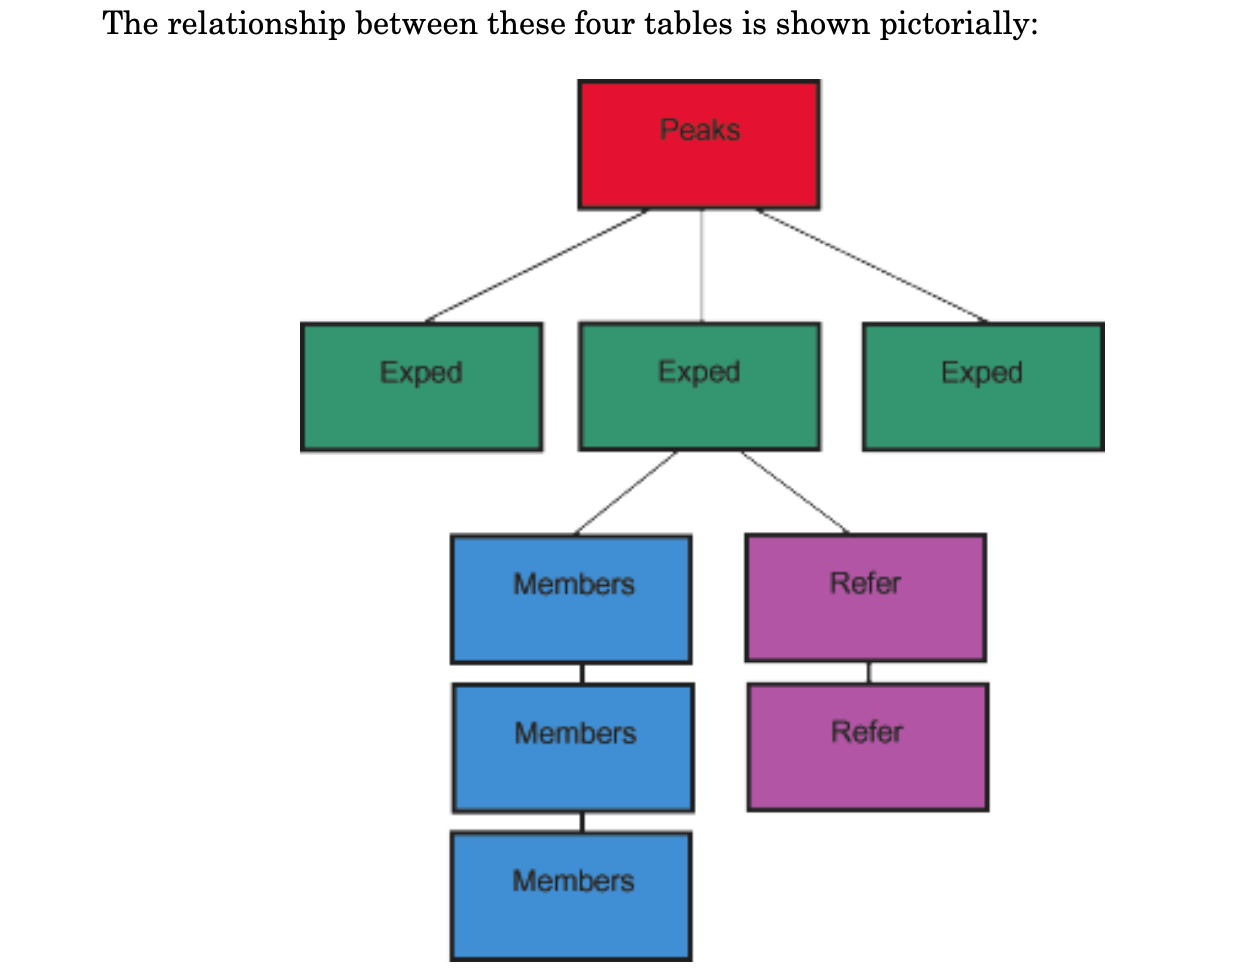

In [238]:
from IPython.display import Image
Image(filename = "data_model.png", width = 600, height = 300)

TODO

- https://observablehq.com/@d3/sortable-bar-chart

- Radar diagram para número de expedicioes por estación (primaavera, otoño...) a lo largo de los años. 

- Network diagram para enlazar expediciones. 

- Flow map para mostrar nacionalidades de las expediciones. ¿Tiene sentido?
- Ranking muertes por número ascensos. 
- Ranking más intentos fallidos. 
- Nacionalidades de las expediciones.

In [239]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi

# To reach a high quality plot  
# Ref: https://ask.sagemath.org/question/48580/how-to-obtain-high-quality-plots-in-the-jupyter-notebook/

%config InlineBackend.figure_format = 'svg'

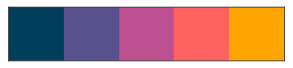

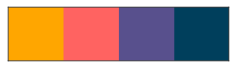

In [327]:
# Create my own palette

# Create an array with the colors you want to use
colors1 = ["#F1D302","#DFAB00","#00DFAC","#0099DF", "#C600DF","#DF0022"]  #https://galactic.ink/sphere/#
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]
# Set your custom color palette
my_palette = sns.color_palette(colors)
sns.set_palette(my_palette)
# Show the palette
sns.palplot(my_palette)

seasonal_colors = ['#ffa600', '#ff6361', '#58508d','#003f5c']
# Set your custom color palette
seasonal_palette = sns.color_palette(seasonal_colors)
sns.set_palette(seasonal_palette)
# Show the palette
sns.palplot(seasonal_palette)

# Peaks

Information in pages 50-59 https://www.himalayandatabase.com/downloads/Himalayan%20Database%20Guide.pdf

In [241]:
# Load data

peaks = pd.read_excel('peaks.xlsx')
peaks.columns

Index(['PEAKID', 'PKNAME', 'PKNAME2', 'LOCATION', 'HEIGHTM', 'HEIGHTF',
       'HIMAL', 'REGION', 'OPEN', 'UNLISTED', 'TREKKING', 'TREKYEAR',
       'RESTRICT', 'PHOST', 'PSTATUS', 'PEAKMEMO', 'PYEAR', 'PSEASON',
       'PEXPID', 'PSMTDATE', 'PCOUNTRY', 'PSUMMITERS', 'PSMTNOTE', 'REFERMEMO',
       'PHOTOMEMO'],
      dtype='object')

In [242]:
# Filter 8000 m peaks

peaks = peaks[peaks['HEIGHTM'] >= 8000]
peaks['PKNAME']

2                Annapurna I
6           Annapurna I East
7         Annapurna I Middle
20                   Cho Oyu
30              Dhaulagiri I
42                   Everest
89     Kangchenjunga Central
91             Kangchenjunga
92       Kangchenjunga South
112                   Lhotse
117              Lhotse Shar
122                   Makalu
123                  Manaslu
188              Yalung Kang
205            Lhotse Middle
362         Yalung Kang West
Name: PKNAME, dtype: object

In [243]:
# Get only the useful columns

peaks = peaks[['PEAKID', 'PKNAME', 'HEIGHTM']]

In [244]:
# Check types

peaks.dtypes

PEAKID     object
PKNAME     object
HEIGHTM     int64
dtype: object

In [245]:
# Change column types 

peaks['PEAKID'] = peaks['PEAKID'].astype("string")
peaks['PKNAME'] = peaks['PKNAME'].astype("string")
peaks.dtypes

PEAKID     string
PKNAME     string
HEIGHTM     int64
dtype: object

In [246]:
# Create list with +8000 m peaks

peaks_8000m = list(peaks['PEAKID'])

# Expeditions

Information in page 60 https://www.himalayandatabase.com/downloads/Himalayan%20Database%20Guide.pdf

In [247]:
# Load data and take only the +8000 m peaks

exped = pd.read_excel('exped.xlsx')
exped = exped[exped['PEAKID'].isin(peaks_8000m)]

In [248]:
# Check types

exped.dtypes

EXPID       object
PEAKID      object
YEAR         int64
SEASON       int64
HOST         int64
            ...   
PRIMRTE       bool
PRIMMEM       bool
PRIMREF    float64
PRIMID      object
CHKSUM       int64
Length: 66, dtype: object

In [249]:
# Change column types 

exped['PEAKID'] = exped['PEAKID'].astype("string")

In [250]:
# Add info from peaks dataframe

exped = exped.merge(peaks, on='PEAKID', how='left')

In [251]:
# Delete useless fields

exped.drop(['COUNTRIES','APPROACH','BCDATE','SMTTIME','TERMDATE','TRAVERSE',\
            'SKI','PARAPENTE', 'CAMPS', 'ROPE', 'SMTHIRED', 'SMTHIRED','OTHERSMTS',\
            'CAMPSITES','ROUTEMEMO', 'PRIMRTE','PRIMMEM','PRIMREF','PRIMID', 'CHKSUM'],\
           axis=1, inplace=True)

In [252]:
# Show column names

exped.columns

Index(['EXPID', 'PEAKID', 'YEAR', 'SEASON', 'HOST', 'ROUTE1', 'ROUTE2',
       'ROUTE3', 'ROUTE4', 'NATION', 'LEADERS', 'SPONSOR', 'SUCCESS1',
       'SUCCESS2', 'SUCCESS3', 'SUCCESS4', 'ASCENT1', 'ASCENT2', 'ASCENT3',
       'ASCENT4', 'CLAIMED', 'DISPUTED', 'SMTDATE', 'SMTDAYS', 'TOTDAYS',
       'TERMREASON', 'TERMNOTE', 'HIGHPOINT', 'TOTMEMBERS', 'SMTMEMBERS',
       'MDEATHS', 'TOTHIRED', 'HDEATHS', 'NOHIRED', 'O2USED', 'O2NONE',
       'O2CLIMB', 'O2DESCENT', 'O2SLEEP', 'O2MEDICAL', 'O2TAKEN', 'O2UNKWN',
       'ACCIDENTS', 'ACHIEVMENT', 'AGENCY', 'COMRTE', 'STDRTE', 'PKNAME',
       'HEIGHTM'],
      dtype='object')

In [253]:
# Check season id's

exped['SEASON'].unique()

array([1, 4, 2, 3, 0])

In [254]:
# Drop season = 0 and rename 

exped = exped[exped['SEASON'].isin((1,2,3,4))]
season_dic = {1:"Spring",2:"Summer",3:"Autumn",4:"Winter"}
exped['SEASON'].replace(season_dic, inplace=True)

In [255]:
# Grouping data

# Expeditions by peak
n_exped_by_peak = exped[['PEAKID','EXPID']].groupby(by='PEAKID',as_index=False).count()
n_exped_by_peak.rename(columns = {'EXPID': 'NEXPED'}, inplace = True)

# Expeditions by year
n_exped_by_year = exped[['YEAR','EXPID']].groupby(by='YEAR',as_index=False).count()
n_exped_by_year.rename(columns = {'EXPID': 'NEXPED'}, inplace = True)

#Expeditions by year and peak
n_exped_by_year_peak = exped[['YEAR','PKNAME','EXPID']].groupby(by=['YEAR', 'PKNAME'],as_index=False).count()
n_exped_by_year_peak.rename(columns = {'EXPID': 'NEXPED'}, inplace = True)

#Expeditions by season and peak
n_exped_by_season_peak = exped[['SEASON', 'PKNAME', 'EXPID']].groupby(by=['SEASON','PKNAME'],as_index=False).count()
n_exped_by_season_peak.rename(columns = {'EXPID': 'NEXPED'}, inplace = True)

# Visualizations


- Number expeditions by year.

- Number expeditions by peak.

- % peak expeditions by season.


## Number expeditions by year

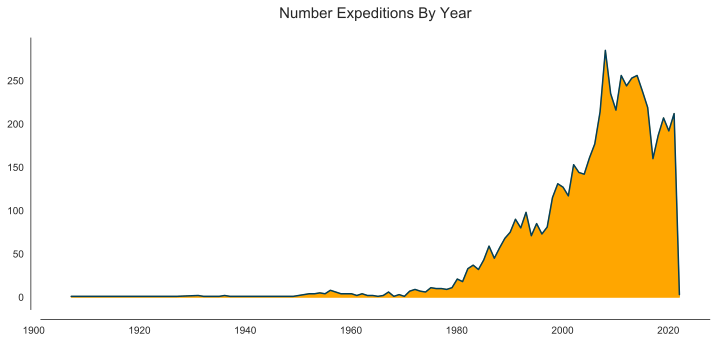

In [256]:
sns.set_style("white")
plt.figure(figsize = (12, 5))
sns.lineplot(x = n_exped_by_year['YEAR'], y = n_exped_by_year['NEXPED'], data = n_exped_by_year, color = "#003f5c")
sns.despine(left = False, offset = 10);
plt.title("Number Expeditions By Year", pad = 20, fontsize=15)
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation = 0, ha = 'right')
plt.fill_between(n_exped_by_year.YEAR.values, n_exped_by_year.NEXPED.values, color = "#ffa600")
plt.show()

## Number expeditions by peak

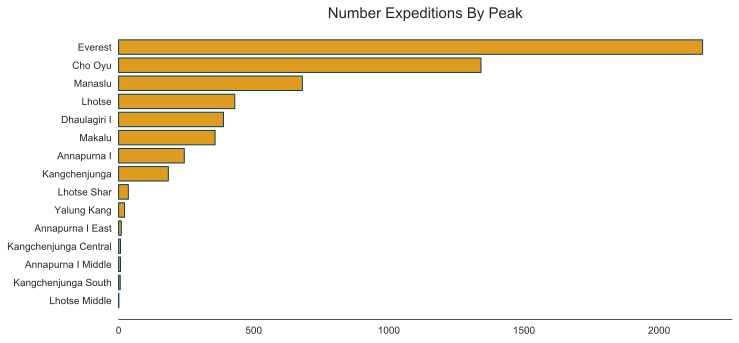

In [257]:
sns.set_style("white")
plt.figure(figsize = (11, 5))
sns.countplot(y = exped['PKNAME'], data = exped, color = "#ffa600", edgecolor = "#003f5c", \
                   order = exped['PKNAME'].value_counts().index)
sns.despine(left = True, offset = 10);
plt.title("Number Expeditions By Peak", pad = 20, fontsize=15)
plt.ylabel("")
plt.xlabel("")
plt.show()

## % peak expeditions by season  

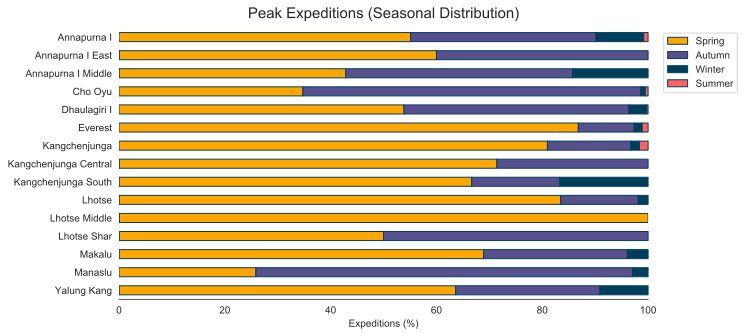

In [258]:
#Total expeditions by peak
total_peak = exped.groupby('PKNAME')['EXPID'].count().reset_index()

#Total expeditions by peak for each season
summer = exped[exped['SEASON']=='Summer'].groupby('PKNAME')['EXPID'].count().reset_index()
winter = exped[exped['SEASON']=='Winter'].groupby('PKNAME')['EXPID'].count().reset_index()
spring = exped[exped['SEASON']=='Spring'].groupby('PKNAME')['EXPID'].count().reset_index()
autumn = exped[exped['SEASON']=='Autumn'].groupby('PKNAME')['EXPID'].count().reset_index()

#For each season series add total_peak
summer = summer.merge(total_peak, on='PKNAME', how = 'left')
winter = winter.merge(total_peak, on='PKNAME', how = 'left')
spring = spring.merge(total_peak, on='PKNAME', how = 'left')
autumn = autumn.merge(total_peak, on='PKNAME', how = 'left')

#Calculate %
summer['Summer'] = summer['EXPID_x'] / summer['EXPID_y'] * 100 
winter['Winter'] = winter['EXPID_x'] / winter['EXPID_y'] * 100 
spring['Spring'] = spring['EXPID_x'] / spring['EXPID_y'] * 100 
autumn['Autumn'] = autumn['EXPID_x'] / autumn['EXPID_y'] * 100 


#Merge data from season series into 
total_peak = total_peak.merge(spring, on='PKNAME', how = 'left').merge(autumn, on='PKNAME', how = 'left')\
             .merge(winter, on='PKNAME', how = 'left').merge(summer, on='PKNAME', how = 'left')\
             [['PKNAME','Spring','Autumn','Winter','Summer']].set_index('PKNAME').sort_index(ascending=False)

#Figure
ax = total_peak.plot(kind="barh", stacked=True, figsize=(9.5,5), xlim=[0,100],\
           color = ['#ffa600', '#58508d','#003f5c','#ff6361'],edgecolor='#003f5c')
ax.set_title('Peak Expeditions (Seasonal Distribution)', fontsize = 15, pad = 10)
ax.set_xlabel("Expeditions (%)")
ax.set_ylabel("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.legend(bbox_to_anchor=(1.02, 1.0));

TODO

Cho Oyu and Manaslu vs. rest

## Patterns between seasons

In [259]:
# Create dataframe with expeditions by peak and season
exped_peak_season = pd.pivot_table(n_exped_by_season_peak, values = 'NEXPED',\
                                   index = 'SEASON', columns = ['PKNAME'],\
                                   aggfunc = np.sum, fill_value = 0)
exped_peak_season

PKNAME,Annapurna I,Annapurna I East,Annapurna I Middle,Cho Oyu,Dhaulagiri I,Everest,Kangchenjunga,Kangchenjunga Central,Kangchenjunga South,Lhotse,Lhotse Middle,Lhotse Shar,Makalu,Manaslu,Yalung Kang
SEASON,,,,,,,,,,,,,,,
Autumn,85,4,3,856,165,228,29,2,1,63,0,18,97,484,6
Spring,134,6,3,466,209,1876,149,5,4,359,1,18,246,176,14
Summer,2,0,0,7,1,24,3,0,0,0,0,0,0,1,0
Winter,22,0,1,12,13,33,3,0,1,8,0,0,14,19,2


In [260]:
# Add total by season
exped_peak_season['total'] = n_exped_by_season_peak.groupby('SEASON').sum()
# Calculate the % of expeditions by peak over total by season 
exped_peak_season = (100 * exped_peak_season.iloc[:,:-1].div(exped_peak_season.total, axis = 0))
exped_peak_season

PKNAME,Annapurna I,Annapurna I East,Annapurna I Middle,Cho Oyu,Dhaulagiri I,Everest,Kangchenjunga,Kangchenjunga Central,Kangchenjunga South,Lhotse,Lhotse Middle,Lhotse Shar,Makalu,Manaslu,Yalung Kang
SEASON,,,,,,,,,,,,,,,
Autumn,4.164625,0.195982,0.146987,41.940225,8.084272,11.170995,1.420872,0.097991,0.048996,3.086722,0.000000,0.881921,4.752572,23.713866,0.293974
Spring,3.655210,0.163666,0.081833,12.711402,5.701037,51.172941,4.064375,0.136388,0.109111,9.792690,0.027278,0.490998,6.710311,4.800873,0.381888
Summer,5.263158,0.000000,0.000000,18.421053,2.631579,63.157895,7.894737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.631579,0.000000
Winter,17.187500,0.000000,0.781250,9.375000,10.156250,25.781250,2.343750,0.000000,0.781250,6.250000,0.000000,0.000000,10.937500,14.843750,1.562500


In [321]:
# Reorder index
exped_peak_season = exped_peak_season.reindex(["Spring", "Summer", "Autumn", "Winter"])

In [339]:
exped_peak_season.iloc[0],exped_peak_season.iloc[1], exped_peak_season.iloc[2],exped_peak_season.iloc[3]

(PKNAME
 Annapurna I               3.655210
 Annapurna I East          0.163666
 Annapurna I Middle        0.081833
 Cho Oyu                  12.711402
 Dhaulagiri I              5.701037
 Everest                  51.172941
 Kangchenjunga             4.064375
 Kangchenjunga Central     0.136388
 Kangchenjunga South       0.109111
 Lhotse                    9.792690
 Lhotse Middle             0.027278
 Lhotse Shar               0.490998
 Makalu                    6.710311
 Manaslu                   4.800873
 Yalung Kang               0.381888
 Name: Spring, dtype: float64,
 PKNAME
 Annapurna I               5.263158
 Annapurna I East          0.000000
 Annapurna I Middle        0.000000
 Cho Oyu                  18.421053
 Dhaulagiri I              2.631579
 Everest                  63.157895
 Kangchenjunga             7.894737
 Kangchenjunga Central     0.000000
 Kangchenjunga South       0.000000
 Lhotse                    0.000000
 Lhotse Middle             0.000000
 Lhotse Shar     

In [373]:
# This function create a plot for one line of the dataset

def radar_plot(nrows, ncols, row, title, color):
    
    # Number of variable
    categories = list(exped_peak_season)
    N = len(categories)
    
    # Define the angle of each axis (categories
    angles = [2 * pi * n / float(N) for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(nrows, ncols, row+1, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1) 
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=5)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    min_value = int(round(exped_peak_season.iloc[row].values.min(),0))
    max_value = round(exped_peak_season.iloc[row].values.max() / 10) * 10 + 10
    range_values = np.arange(min_value,max_value,10).tolist()
    range_values_str = [str(i) for i in range_values]
    plt.yticks(range_values, range_values_str, color="grey", size=6)
    plt.ylim(min_value,max_value)
    
    # Ind1
    values = exped_peak_season.iloc[row].values.tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

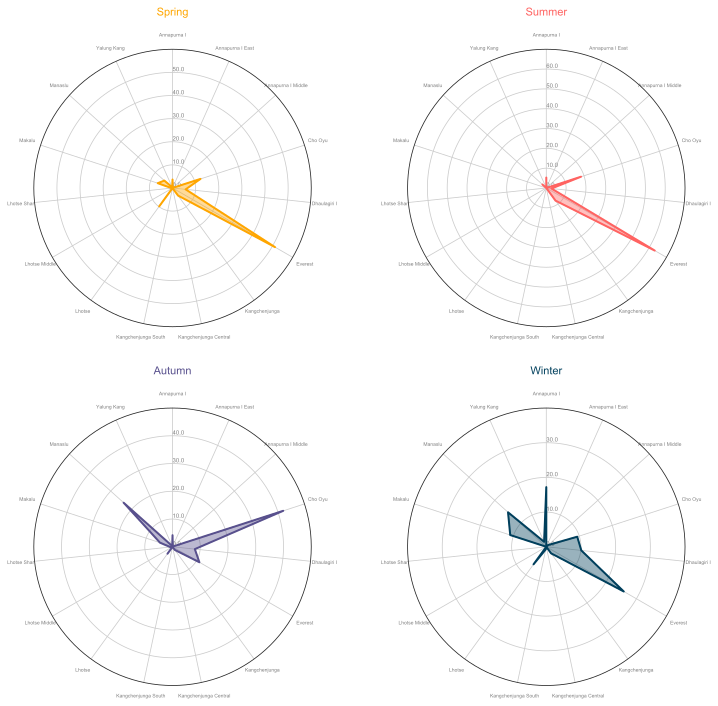

In [374]:
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Loop to plot
for row in range(0, len(exped_peak_season.index)):
    radar_plot(nrows=2, ncols=2, row=row, title=exped_peak_season.index.tolist()[row], color=seasonal_palette[row])

plt.tight_layout(pad=1.08, h_pad=2.0, w_pad=5.0, rect=None)